In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
import statannot
import pymannkendall as mk
from scipy import stats
from scipy.stats import mannwhitneyu, normaltest,wilcoxon
import sankey as sankeyy # customized from https://github.com/anazalea/pySankey

sns.set(font="Arial")
plt.rcParams["font.family"] = "Arial"
sns.set_style("whitegrid")
plt.rcParams["mathtext.fontset"]='custom'

In [2]:
sims=pd.read_csv("MS_similar_amp_pairs_after_cutoff_08212023.csv")

In [3]:
sims['amplicon_classification_1'] =sims['amplicon_classification_1'].str.replace('Non-ecDNA','ChrAmp')
sims['amplicon_classification_2'] =sims['amplicon_classification_2'].str.replace('Non-ecDNA','ChrAmp')

sims['amplicon_classification_1'] =sims['amplicon_classification_1'].str.replace('No amp/Invalid','NoAmp')
sims['amplicon_classification_2'] =sims['amplicon_classification_2'].str.replace('No amp/Invalid','NoAmp')

In [4]:
%matplotlib inline

Text(21, -5, 'Time point 2')

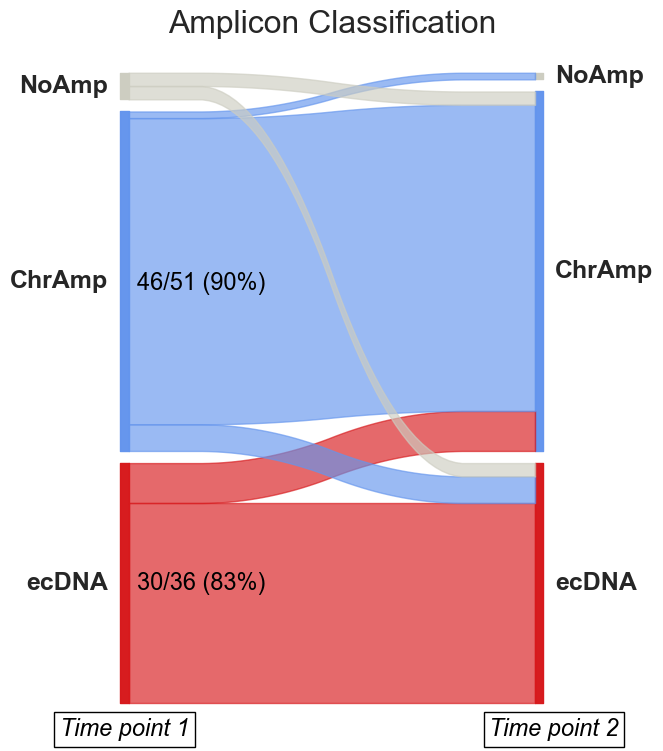

In [5]:
colors = {
    "ecDNA":"#D7191C",
    "ChrAmp": "#6495ED",
    "NoAmp": "#CDCDC1"
}

#plt.figure(figsize=(10,30))
plt.rc("text", usetex=False)
plt.rc("font", family="Arial")
plt.rcParams.update({'font.size': 10})

sankeyy.sankey(sims['amplicon_classification_1'], sims['amplicon_classification_2'], colorDict=colors)
plt.rcParams["mathtext.default"]='it'

# Get current figure
fig = plt.gcf()

# Set size in inches
fig.set_size_inches(6, 9)
plt.title("Amplicon Classification",fontsize=23,y=1)
plt.text(.5,17,'30/36 (83%)', fontsize = 17,fontweight='normal',fontstyle='normal',color='black')
plt.text(.5,62,'46/51 (90%)', fontsize = 17,fontweight='normal',fontstyle='normal',color='black')

plt.text(-4,-5,'Time point 1', fontsize = 17,fontweight='normal',fontstyle='italic',color='black',\
        bbox = dict(facecolor = 'none',edgecolor='black'))
plt.text(21,-5,'Time point 2', fontsize = 17,fontweight='normal',fontstyle='italic',color='black',\
         bbox = dict(facecolor = 'none',edgecolor='black'))

#plt.savefig("/images/pngs/Fig3A.png", format="png", bbox_inches="tight",dpi=1200)
#plt.savefig("/images/pdfs/Fig3A.pdf", format="pdf", bbox_inches="tight",dpi=1200)


In [6]:
sims['both'].value_counts()

Non-ecDNA > Non-ecDNA         46
ecDNA > ecDNA                 30
ecDNA > Non-ecDNA              6
Non-ecDNA > ecDNA              4
No amp/Invalid > ecDNA         2
No amp/Invalid > Non-ecDNA     2
Non-ecDNA > No amp/Invalid     1
Name: both, dtype: int64

In [7]:
sims['amplicon_classification_1'].value_counts()

ChrAmp    51
ecDNA     36
NoAmp      4
Name: amplicon_classification_1, dtype: int64